In [1]:
import numpy, pandas, quandl

In [46]:
import numpy as np 
import pandas as pd
import quandl
from pylab import mpl, plt
plt.style.use('seaborn')
%matplotlib inline
import pandas_datareader.data as web
import datetime
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame
import statsmodels.formula.api as smf

quandl.ApiConfig.api_key = "pTygJpdkhxBLRczvBgTp"


In [49]:
# import S&P 500 Prices and % Change from Excel 
names= ['Date','Adjusted Close', '% Change']
df = pd.read_excel('SP500 Prices 1949_2020.xlsx', names=['Date','Adjusted Close','% Change'])
df.head()


df = pd.read_excel('SP500 Prices 1949_2020.xlsx', names=names, index_col='Date')
df.head()


df = (df.sort_values(by=['Date']))

df




,Adjusted Close,% Change
Date,,
1949-12-30,16.79,4.545455
1950-01-31,17.05,1.548541
1950-02-28,17.22,0.997067
1950-03-31,17.29,0.406504
1950-04-28,17.96,3.875072
...,...,...
2020-08-31,3500.31,7.006469
2020-09-30,3363.00,-3.922795
2020-10-30,3269.96,-2.766577


In [50]:
# import ISM PMI from Eccel
names= ['Date','PMI', 'Change PMI']
data = pd.read_excel('PMI_monthly 1949_2020.xlsx', names=names, index_col='Date')
data.head()


data = data.loc[:,['PMI']]
data.tail()


,PMI
Date,
1950-04-28,68.1
1950-03-31,62.1
1950-02-28,60.5
1950-01-31,59.1
1949-12-30,57.3


In [51]:
# calculate monthly percentage change of PMI
data1 = data.pct_change()
data1

data1 = data1.rename(columns ={"PMI":"% Change PMI"})
print(data1)

            % Change PMI
Date                    
2020-12-31           NaN
2020-11-30     -0.046281
2020-10-30      0.019064
2020-09-30     -0.052721
2020-08-31     -0.001795
...                  ...
1950-04-28     -0.088353
1950-03-31     -0.088106
1950-02-28     -0.025765
1950-01-31     -0.023140
1949-12-30     -0.030457

[853 rows x 1 columns]


In [52]:
# Reduce S&P 500 data to monthly adjusted Close prices
df = df.loc[:,['Adjusted Close']]
df.head()

,Adjusted Close
Date,
1949-12-30,16.79
1950-01-31,17.05
1950-02-28,17.22
1950-03-31,17.29
1950-04-28,17.96


In [53]:
# Compute returns from Price Series of S&P 500
df_Performance = df.pct_change()
df_Performance.head()



,Adjusted Close
Date,
1949-12-30,NaN
1950-01-31,0.015485
1950-02-28,0.009971
1950-03-31,0.004065
1950-04-28,0.038751


In [54]:
# Merge returns SPX, Change PMI
Overview = pd.concat([df_Performance,data1], axis=1)
Overview.fillna(0)
Overview = Overview.fillna(0)
Overview


,Adjusted Close,% Change PMI
Date,,
1949-12-30,0.000000,-0.030457
1950-01-31,0.015485,-0.023140
1950-02-28,0.009971,-0.025765
1950-03-31,0.004065,-0.088106
1950-04-28,0.038751,-0.088353
...,...,...
2020-08-31,0.070065,-0.001795
2020-09-30,-0.039228,-0.052721
2020-10-30,-0.027666,0.019064


In [55]:
# Merge monthly S&P 500 performance, PMI and monthly PMI changes into a table
Overview2 = pd.concat([df_Performance,data,data1], axis=1, names=['Adjusted Close','PMI','Change PMI'])
Overview2 = Overview2.fillna(0)
Overview2

print(Overview2)
Overview2

            Adjusted Close   PMI  % Change PMI
Date                                          
1949-12-30        0.000000  57.3     -0.030457
1950-01-31        0.015485  59.1     -0.023140
1950-02-28        0.009971  60.5     -0.025765
1950-03-31        0.004065  62.1     -0.088106
1950-04-28        0.038751  68.1     -0.088353
...                    ...   ...           ...
2020-08-31        0.070065  55.6     -0.001795
2020-09-30       -0.039228  55.7     -0.052721
2020-10-30       -0.027666  58.8      0.019064
2020-11-30        0.107546  57.7     -0.046281
2020-12-31        0.037121  60.5      0.000000

[853 rows x 3 columns]


,Adjusted Close,PMI,% Change PMI
Date,,,
1949-12-30,0.000000,57.3,-0.030457
1950-01-31,0.015485,59.1,-0.023140
1950-02-28,0.009971,60.5,-0.025765
1950-03-31,0.004065,62.1,-0.088106
1950-04-28,0.038751,68.1,-0.088353
...,...,...,...
2020-08-31,0.070065,55.6,-0.001795
2020-09-30,-0.039228,55.7,-0.052721
2020-10-30,-0.027666,58.8,0.019064


In [56]:
# Estimate OlS Regression on returns SPX and Change PMI
Overview_df = sm.add_constant(Overview)
Overview_df.head()

,const,Adjusted Close,% Change PMI
Date,,,
1949-12-30,1.0,0.000000,-0.030457
1950-01-31,1.0,0.015485,-0.023140
1950-02-28,1.0,0.009971,-0.025765
1950-03-31,1.0,0.004065,-0.088106
1950-04-28,1.0,0.038751,-0.088353


In [57]:
# Regression SPX return and PMI % change
model = sm.OLS(Overview_df['Adjusted Close'], Overview_df['% Change PMI'], missing='drop')
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         Adjusted Close   R-squared (uncentered):                   0.045
Model:                            OLS   Adj. R-squared (uncentered):              0.044
Method:                 Least Squares   F-statistic:                              39.94
Date:                Thu, 06 May 2021   Prob (F-statistic):                    4.23e-10
Time:                        12:11:29   Log-Likelihood:                          1508.5
No. Observations:                 853   AIC:                                     -3015.
Df Residuals:                     852   BIC:                                     -3010.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

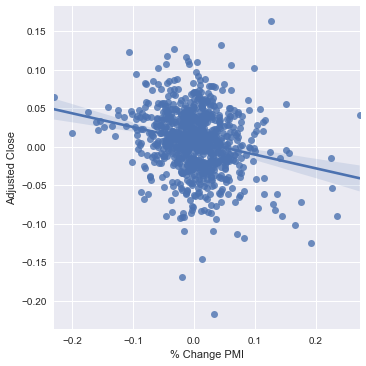

In [58]:
sns.lmplot(y="Adjusted Close", x="% Change PMI", data=Overview);

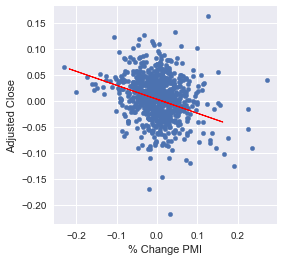

In [59]:
reg = np.polyfit(Overview['Adjusted Close'], Overview['% Change PMI'], deg=1)
ax = Overview.plot(kind='scatter', y='Adjusted Close', x='% Change PMI', figsize=(4, 4))
ax.plot(Overview['Adjusted Close'], np.polyval(reg, Overview['Adjusted Close']), 'r', lw=1
    )

Text(0, 0.5, '% Change PMI')

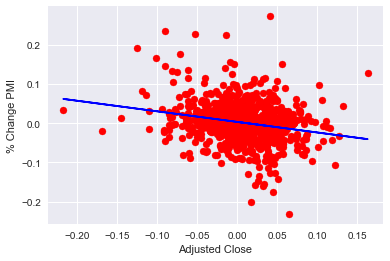

In [60]:
x = Overview[['Adjusted Close']]
y = Overview[['% Change PMI']]

regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)

plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.xlabel('Adjusted Close')
plt.ylabel('% Change PMI')


In [61]:
# Compute Correlation between PMI Change and SPX monthly retunrs
Overview.corr()

,Adjusted Close,% Change PMI
Adjusted Close,1.000000,-0.219031
% Change PMI,-0.219031,1.000000


In [62]:
Overview2


,Adjusted Close,PMI,% Change PMI
Date,,,
1949-12-30,0.000000,57.3,-0.030457
1950-01-31,0.015485,59.1,-0.023140
1950-02-28,0.009971,60.5,-0.025765
1950-03-31,0.004065,62.1,-0.088106
1950-04-28,0.038751,68.1,-0.088353
...,...,...,...
2020-08-31,0.070065,55.6,-0.001795
2020-09-30,-0.039228,55.7,-0.052721
2020-10-30,-0.027666,58.8,0.019064


In [18]:
# derive SPX returns from PMI 45-50, if PMI is increasing
OV45_50_pos = Overview2[Overview2['PMI'].between(45,50)]
OV45_50_pos = OV45_50_pos[OV45_50_pos['% Change PMI'] > 0]

OV45_50_pos.head()
return45_50_pos = OV45_50_pos.loc[:,'Adjusted Close']
return45_50_pos.mean()

return45_50_pos.mean()


-0.0026056558614078566

In [19]:
# derive SPX returns from PMI 45-50, if PMI is decreasing
OV45_50_neg = Overview2[Overview2['PMI'].between(45,50)]
OV45_50_neg = OV45_50_neg[OV45_50_neg['% Change PMI'] < 0]

return45_50_neg = OV45_50_neg.loc[:,'Adjusted Close']
return45_50_neg.mean()

0.006742660757942142

In [22]:
# derive SPX returns from PMI 40-45, if PMI is increasing
OV40_45_pos = Overview2[Overview2['PMI'].between(40,45)]
OV40_45_pos = OV40_45_pos[OV40_45_pos['% Change PMI'] > 0]

return40_45_pos = OV40_45_pos.loc[:,'Adjusted Close']


return



In [20]:
# derive SPX returns from PMI 40-45, if PMI is decreasing
OV40_45_neg = Overview2[Overview2['PMI'].between(40,45)]
OV40_45_neg = OV40_45_neg[OV40_45_neg['% Change PMI'] < 0]

return40_45_neg = OV40_45_neg.loc[:,'Adjusted Close']
return40_45_neg.mean()

0.014259217940160319

In [21]:
# derive SPX returns from PMI 50-55, if PMI is increasing

OV50_55_pos = Overview2[Overview2['PMI'].between(50,55)]
OV50_55_pos = OV50_55_pos[OV50_55_pos['% Change PMI'] > 0]

return50_55_pos = OV50_55_pos.loc[:,'Adjusted Close']
return50_55_pos.mean()




-0.0020578001165217795

In [22]:
# derive SPX returns from PMI 50-55, if PMI is decreasing

OV50_55_neg = Overview2[Overview2['PMI'].between(50,55)]
OV50_55_neg = OV50_55_neg[OV50_55_neg['% Change PMI'] < 0]

return50_55_neg = OV50_55_neg.loc[:,'Adjusted Close']
return50_55_neg.mean()

0.00739008027565766

In [23]:
# derive SPX returns from PMI 55-60, if PMI is increasing

OV55_60_pos = Overview2[Overview2['PMI'].between(55,60)]
OV55_60_pos = OV55_60_pos[OV55_60_pos['% Change PMI'] > 0]

return55_60_pos = OV55_60_pos.loc[:,'Adjusted Close']

return55_60_pos.mean()



0.0010339439294063902

In [25]:
# derive SPX returns from PMI 55-60, if PMI is decreasing

OV55_60_neg = Overview2[Overview2['PMI'].between(55,60)]
OV55_60_neg = OV55_60_neg[OV55_60_neg['% Change PMI'] < 0]

return55_60_neg = OV55_60_neg.loc[:,'Adjusted Close']

return55_60_neg.mean()

0.009883696144744327

In [26]:
# derive SPX returns from PMI below 50, if PMI is increasing
OV0_50_pos = Overview2[Overview2['PMI'].between(0,50)]
OV0_50_pos = OV0_50_pos[OV0_50_pos['% Change PMI'] > 0]

return0_50_pos = OV0_50_pos.loc[:,'Adjusted Close']

return0_50_pos.mean()



0.0017545523300030344

In [27]:
# derive SPX returns from PMI below 50, if PMI is decreasing

OV0_50_neg = Overview2[Overview2['PMI'].between(0,50)]
OV0_50_neg = OV0_50_neg[OV0_50_neg['% Change PMI'] < 0]

return0_50_neg = OV0_50_neg.loc[:,'Adjusted Close']
return0_50_neg.mean()


0.011806161192855893

In [71]:
# derive SPX returns from PMI above 50, if PMI is increasing

OV50_100_pos = Overview2[Overview2['PMI'].between(50,100)]
OV50_100_pos = OV50_100_pos[OV50_100_pos['% Change PMI'] > 0]

return50_100_pos = OV50_100_pos.loc[:,'Adjusted Close']
return50_100_pos.mean()

0.008555829544864044

In [28]:
# derive SPX returns from PMI above 50, if PMI is decreasing

OV50_100_neg = Overview2[Overview2['PMI'].between(50,100)]
OV50_100_neg = OV50_100_neg[OV50_100_neg['% Change PMI'] < 0]

return50_100_neg = OV50_100_neg.loc[:,'Adjusted Close']
return50_100_neg.mean()

0.00805534794925908

In [ ]:
# Now, use IP Change as controll varible to see impact

In [29]:
IP_Change = pd.read_excel('IP Change.xlsx', index_col='Date')
IP_Change

,% Change IP
Date,
2020-12-31,0.0102
2020-11-30,0.0089
2020-10-30,0.0101
2020-09-30,-0.0008
2020-08-31,0.0096
...,...
1970-05-29,-0.0012
1970-04-30,-0.0026
1970-03-31,-0.0013


In [17]:
# Prepare PMI Change +/- for dummy
PMI_pos = Overview2[Overview2['% Change PMI'] > 0]
PMI_pos = PMI_pos.loc[:,['% Change PMI']]
PMI_pos

PMI_neg = Overview2[Overview2['% Change PMI'] < 0], rename=PMI_neg
PMI_neg = PMI_neg.loc[:,['% Change PMI']]
PMI_neg

NameError: name 'PMI_neg' is not defined

In [30]:
# Merge SPX Performance / PMI Change and IP Change
Overview3 = pd.concat([df_Performance,data1,IP_Change], axis=1)
Overview3 = Overview3.dropna()


In [31]:
print(Overview3)


            Adjusted Close  % Change PMI  % Change IP
Date                                                 
1970-03-31        0.001453      0.042222      -0.0013
1970-04-30       -0.090483     -0.046610      -0.0026
1970-06-30       -0.050033      0.032323      -0.0032
1970-07-31        0.073295      0.046512       0.0025
1970-08-31        0.044459      0.072562      -0.0018
...                    ...           ...          ...
2020-06-30        0.018388     -0.027933       0.0624
2020-07-31        0.055101     -0.034173       0.0420
2020-08-31        0.070065     -0.001795       0.0096
2020-09-30       -0.039228     -0.052721      -0.0008
2020-11-30        0.107546     -0.046281       0.0089

[436 rows x 3 columns]


NameError: name 'Overview4' is not defined

In [33]:
# Create dummy for PMI Change where 1 is rising PMI and 0 decreasing PMI
pd.get_dummies
Overview3['dummy'] = 0
for i in range(0,len(Overview3)): 
    if Overview3["% Change PMI"][i] > 0:
        Overview3['dummy'][i] = 1
        
        
        
        
print(Overview3)



            Adjusted Close  % Change PMI  % Change IP  dummy
Date                                                        
1970-03-31        0.001453      0.042222      -0.0013      1
1970-04-30       -0.090483     -0.046610      -0.0026      0
1970-06-30       -0.050033      0.032323      -0.0032      1
1970-07-31        0.073295      0.046512       0.0025      1
1970-08-31        0.044459      0.072562      -0.0018      1
...                    ...           ...          ...    ...
2020-06-30        0.018388     -0.027933       0.0624      0
2020-07-31        0.055101     -0.034173       0.0420      0
2020-08-31        0.070065     -0.001795       0.0096      0
2020-09-30       -0.039228     -0.052721      -0.0008      0
2020-11-30        0.107546     -0.046281       0.0089      0

[436 rows x 4 columns]


<ipython-input-33-b72d5f105b3d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Overview3['dummy'][i] = 1


In [34]:
PMI_dummy = Overview3['dummy']
PMI_dummy

Date
1970-03-31    1
1970-04-30    0
1970-06-30    1
1970-07-31    1
1970-08-31    1
             ..
2020-06-30    0
2020-07-31    0
2020-08-31    0
2020-09-30    0
2020-11-30    0
Name: dummy, Length: 436, dtype: int64

In [35]:
Overview4 = pd.concat([df_Performance,data1,IP_Change,PMI_dummy], axis=1)
Overview4 = Overview4.dropna()
print(Overview4)


            Adjusted Close  % Change PMI  % Change IP  dummy
Date                                                        
1970-03-31        0.001453      0.042222      -0.0013    1.0
1970-04-30       -0.090483     -0.046610      -0.0026    0.0
1970-06-30       -0.050033      0.032323      -0.0032    1.0
1970-07-31        0.073295      0.046512       0.0025    1.0
1970-08-31        0.044459      0.072562      -0.0018    1.0
...                    ...           ...          ...    ...
2020-06-30        0.018388     -0.027933       0.0624    0.0
2020-07-31        0.055101     -0.034173       0.0420    0.0
2020-08-31        0.070065     -0.001795       0.0096    0.0
2020-09-30       -0.039228     -0.052721      -0.0008    0.0
2020-11-30        0.107546     -0.046281       0.0089    0.0

[436 rows x 4 columns]


In [36]:

y = Overview4['Adjusted Close']
x1 = Overview4[['% Change IP','dummy']]
x = x = sm.add_constant(x1)
results2 = sm. OLS(y,x).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Adjusted Close   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     4.750
Date:                Tue, 04 May 2021   Prob (F-statistic):            0.00911
Time:                        09:56:40   Log-Likelihood:                 746.85
No. Observations:                 436   AIC:                            -1488.
Df Residuals:                     433   BIC:                            -1475.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0125      0.003      4.387      0.000       0.007       0.018
% Change IP    -0.3642      0.205     -1.776      0.076      -0.767       0.039
dummy          -0.0111      0.004     -2.627      0.009      -0.019      -0.003
==============================================================================
Omnibus:                       21.090   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.377
Skew:                          -0.363   Prob(JB):                     9.32e-08
Kurtosis:                       4.121   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
Overview4.describe()

,Adjusted Close,% Change PMI,% Change IP,dummy
count,436.000000,436.000000,436.000000,436.000000
mean,0.007044,-0.002779,0.001336,0.449541
std,0.044162,0.047729,0.010259,0.498019
min,-0.169425,-0.230769,-0.126800,0.000000
25%,-0.018414,-0.026588,-0.002625,0.000000
50%,0.009340,-0.003401,0.001700,0.000000
75%,0.035790,0.019591,0.005625,1.000000
max,0.163047,0.272109,0.062400,1.000000
